In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("D:/Entertainment/Case Study/Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
len(df["Request id"].unique())

6745

In [6]:
df.shape

(6745, 6)

In [7]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
(df.isnull().sum()/df.shape[0])*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [10]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 9:40         6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 22:00        5
                      ..
15-07-2016 21:03:02    1
15-07-2016 07:47:23    1
12/7/2016 6:47         1
15-07-2016 17:17:50    1
13-07-2016 18:01:34    1
Name: Request timestamp, Length: 5618, dtype: int64

In [11]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [12]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [13]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [15]:
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [16]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [18]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [19]:
req_hour=df["Request timestamp"].dt.hour

In [20]:
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [21]:
len(req_hour)

6745

In [22]:
df["req_hour"]=req_hour

In [23]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [24]:
req_day=df["Request timestamp"].dt.day

In [25]:
df["req_day"]=req_day

In [26]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


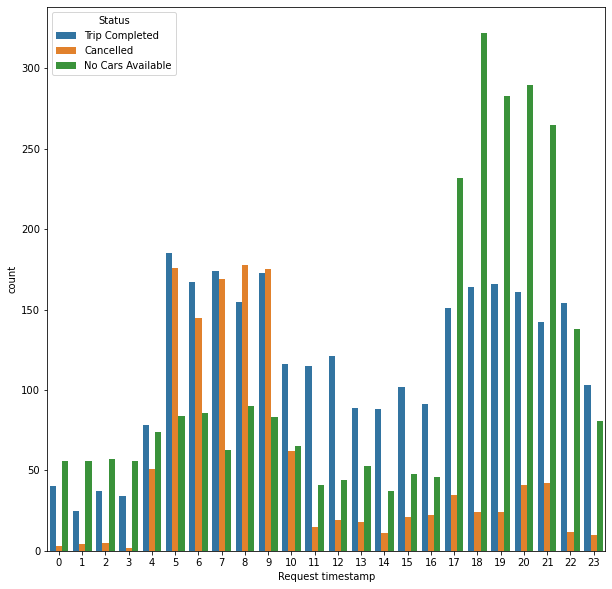

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(req_hour,data=df,hue="Status")
plt.show()

C:\Users\Dheeraj_Pandey\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


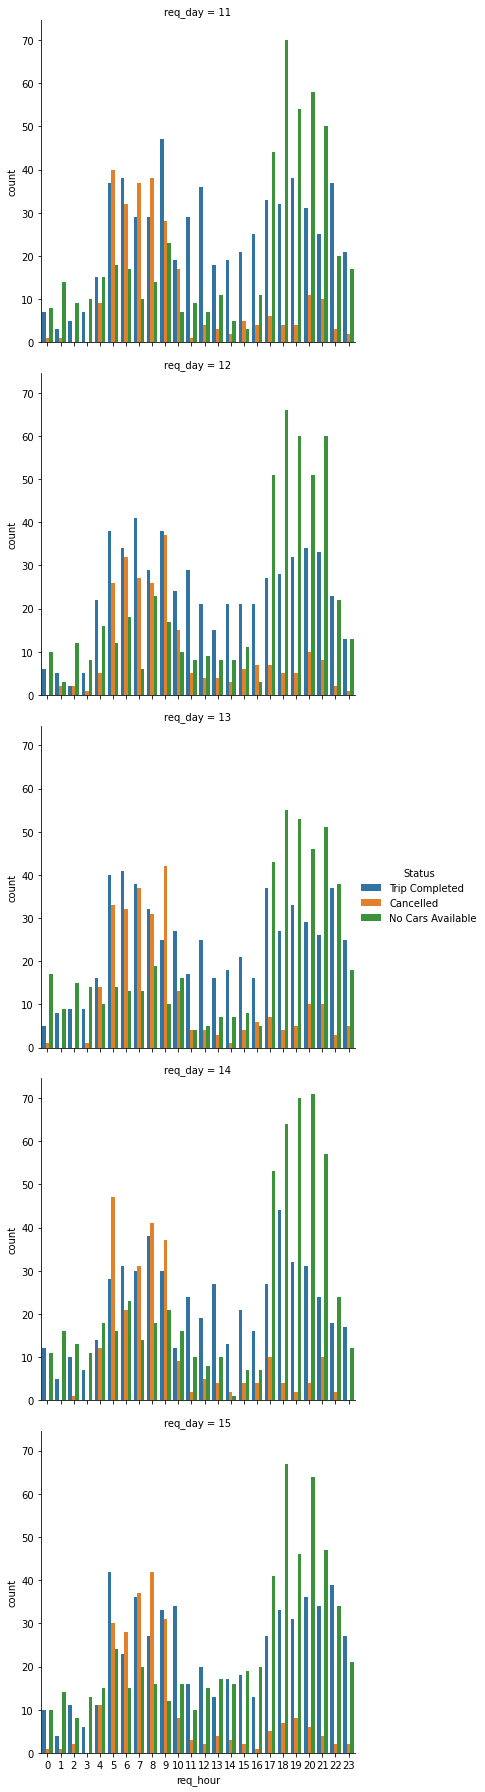

In [29]:
sns.factorplot(x="req_hour",data=df,hue="Status",row="req_day",kind="count")
plt.show()

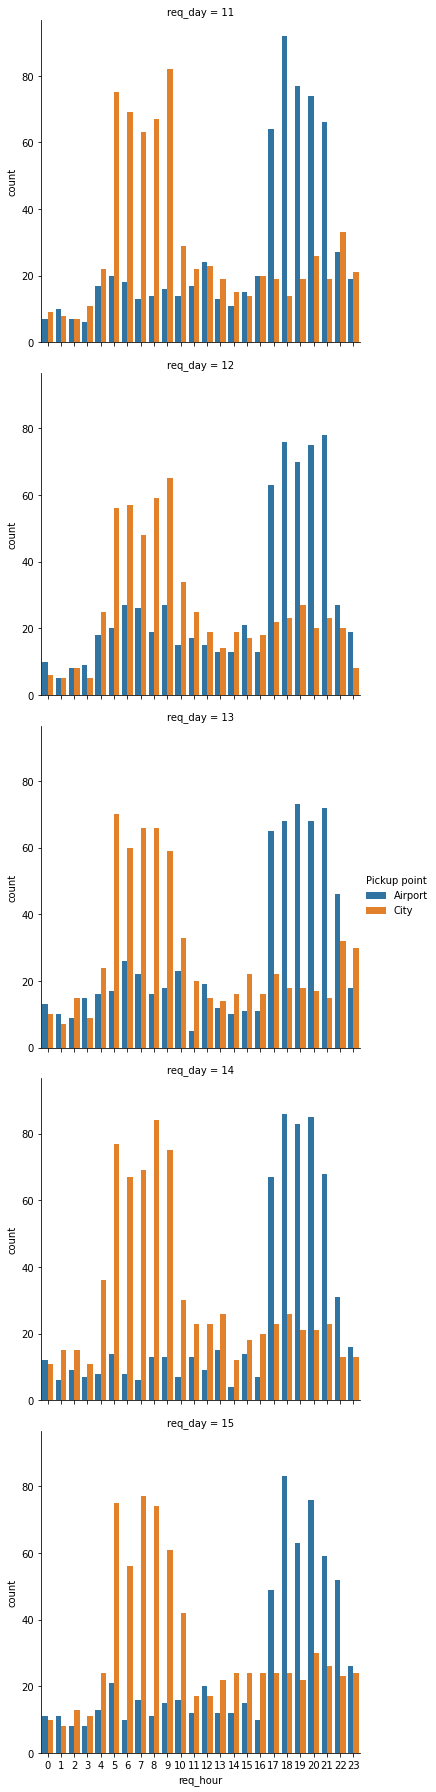

In [30]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",row="req_day",kind="count")
plt.show()

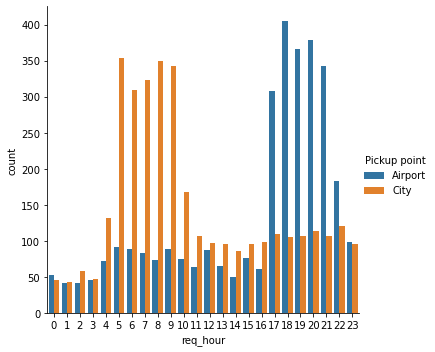

In [31]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [32]:
df["Time_slot"]=0

In [33]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [34]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8] = "Pre_Morning"
    elif df.iloc[j,6]<10:
        df.iloc[j,8] = "Morning_Rush"
    elif df.iloc[j,6]<17:
        df.iloc[j,8]="Day_Time"
    elif df.iloc[j,6]<22:
        df.iloc[j,8]="Evening_Rush"
    else:
        df.iloc[j,8]="Late_Night"
    j+=1
        

In [35]:
 df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [36]:
df["Time_slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_slot, dtype: int64

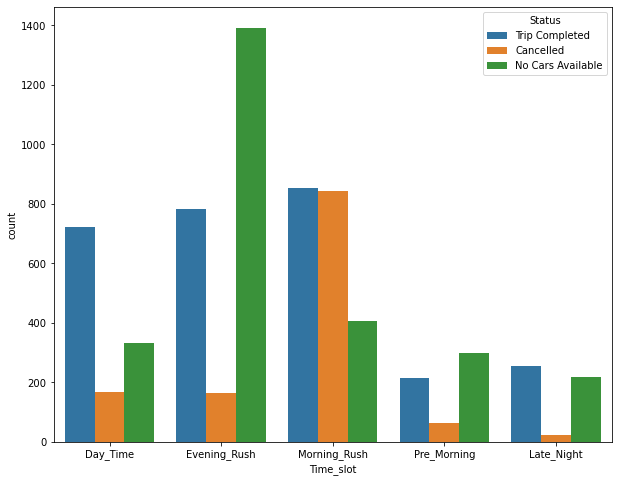

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x="Time_slot",data=df,hue="Status")
plt.show()


In [38]:
df_morning_rush=df[df["Time_slot"]=="Morning_Rush"]

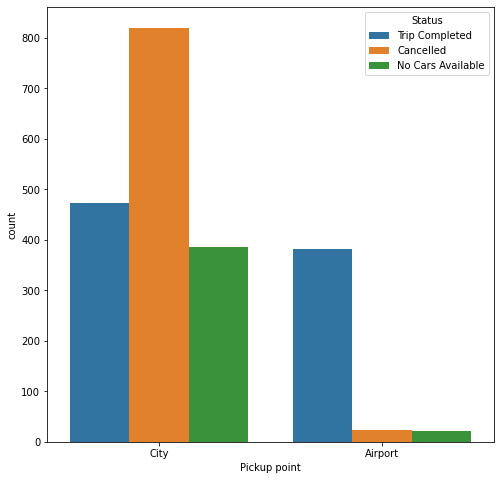

In [39]:
plt.figure(figsize=(8,8))
sns.countplot(x="Pickup point",data=df_morning_rush,hue="Status")
plt.show()


In [40]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2841,1867,Airport,3.0,Cancelled,2016-07-12 09:59:00,NaT,9,12,Morning_Rush
2909,1462,Airport,23.0,Cancelled,2016-07-12 05:01:00,NaT,5,12,Morning_Rush
2910,196,Airport,24.0,Cancelled,2016-07-11 06:07:00,NaT,6,11,Morning_Rush
2944,5847,Airport,31.0,Cancelled,2016-07-15 09:05:38,NaT,9,15,Morning_Rush
3130,2844,Airport,74.0,Cancelled,2016-07-13 05:28:12,NaT,5,13,Morning_Rush
3157,5806,Airport,81.0,Cancelled,2016-07-15 08:46:33,NaT,8,15,Morning_Rush
3202,3018,Airport,92.0,Cancelled,2016-07-13 07:27:44,NaT,7,13,Morning_Rush
3254,5854,Airport,103.0,Cancelled,2016-07-15 09:09:32,NaT,9,15,Morning_Rush
3315,174,Airport,119.0,Cancelled,2016-07-11 05:44:00,NaT,5,11,Morning_Rush
3349,1776,Airport,128.0,Cancelled,2016-07-12 09:02:00,NaT,9,12,Morning_Rush


In [41]:
df_airport_cancelled.shape[0]

23

In [42]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
df_city_cancelled

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,6,13,Morning_Rush
2837,4451,City,2.0,Cancelled,2016-07-14 08:38:38,NaT,8,14,Morning_Rush
2842,4383,City,3.0,Cancelled,2016-07-14 07:48:31,NaT,7,14,Morning_Rush
2846,4280,City,4.0,Cancelled,2016-07-14 06:33:09,NaT,6,14,Morning_Rush
2847,4533,City,4.0,Cancelled,2016-07-14 09:31:08,NaT,9,14,Morning_Rush
...,...,...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-07-12 07:20:00,NaT,7,12,Morning_Rush
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:10,NaT,5,14,Morning_Rush
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:40,NaT,5,14,Morning_Rush
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:59,NaT,8,14,Morning_Rush


In [43]:
df_city_cancelled.shape[0]

820

# Supply & Demand for morning rush

In [44]:
#total number of times request made in morning rush hour at city
df_morning_rush["Pickup point"].value_counts()

City       1677
Airport     426
Name: Pickup point, dtype: int64

In [45]:
df_morning_rush.loc[(df_morning_rush["Status"]=="Trip Completed") & (df_morning_rush["Pickup point"]=="City")].shape[0]

472

In [46]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [47]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [48]:
df_evening_rush=df[df["Time_slot"]=="Evening_Rush"]

In [49]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]


In [50]:
df_city_cancelled.shape[0]

60

# Supply & Demand for evening rush

In [51]:
df_evening_rush["Pickup point"].value_counts()

Airport    1800
City        542
Name: Pickup point, dtype: int64

In [52]:
df_evening_rush.loc[(df_evening_rush["Status"]=="Trip Completed") & (df_evening_rush["Pickup point"]=="City")].shape[0]

411

In [53]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [54]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

# Severity problem at each location by looking at cancellation of cabs in each of the pickup location


In [55]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [56]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

# Severity of problem by location in morning rush

In [57]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [58]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [59]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

In [60]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

In [61]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

In [62]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

# Pie chart for morning rush City


In [94]:
df_morning_rush=df.loc[(df["Pickup point"]=="City") & (df["Time_slot"]=="Morning_Rush")]

In [95]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


In [97]:
df_morning_rush_counts=pd.DataFrame(df_morning_rush["Status"].value_counts())

In [98]:
df_morning_rush_counts

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [99]:
df_morning_rush_counts["Status"].values

array([820, 472, 385], dtype=int64)

In [100]:
df_morning_rush_counts["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

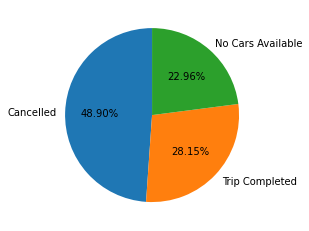

In [101]:
fig,ax=plt.subplots()
ax.pie(df_morning_rush_counts["Status"].values,labels=df_morning_rush_counts["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

# Pie chart for Evening rush airport


In [102]:
df_evening_rush=df.loc[(df["Pickup point"]=="Airport") & (df["Time_slot"]=="Evening_Rush")]

In [104]:
df_evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush
19,960,Airport,3.0,Trip Completed,2016-07-11 18:45:00,2016-07-11 19:23:00,18,11,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening_Rush


In [106]:
df_evening_rush_counts=pd.DataFrame(df_evening_rush["Status"].value_counts())

In [107]:
df_evening_rush_counts

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [110]:
df_evening_rush_counts.values

array([[1321],
       [ 373],
       [ 106]], dtype=int64)

In [111]:
df_evening_rush_counts.index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

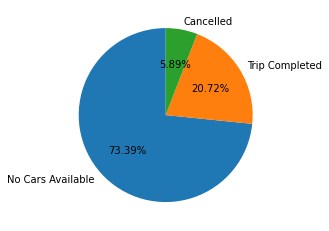

In [116]:
fig,ax=plt.subplots()
ax.pie(df_evening_rush_counts["Status"].values,labels=df_evening_rush_counts.index,autopct="%.2f%%",startangle=90)
plt.show()

In [117]:
#1) Need to increase car availibility  in evening rush in Airport area,or need to give incentives to the drivers for every trip colpeted in airport area.
#2) Drivers can be given bonus for not cancelling the trips in city in morning rush
#3) 